In [1]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string


In [2]:
# Show all the coplumns
pd.set_option('display.max_columns', None)
# show all the rows
pd.set_option('display.max_rows', None)
# Set the value length as 100
pd.set_option('max_colwidth',100)


pd.set_option("display.max_colwidth",1000)
pd.set_option('display.width',1000)

pd.set_option('max_info_rows', None)


In [3]:
#To plot figs on jupyter
%matplotlib inline

In [25]:
%cd /Users/yantong/Desktop/lending_club/dataset/Model_data/Model\ Dataset 


/Users/yantong/Desktop/lending_club/dataset/Model_data/Model Dataset


In [26]:
df_19Q1 = pd.read_csv('LoanStats_securev1_2019Q1.csv')
df_18Q4 = pd.read_csv('LoanStats_securev1_2018Q4.csv')
df_18Q3 = pd.read_csv('LoanStats_securev1_2018Q3.csv')
df_18Q2 = pd.read_csv('LoanStats_securev1_2018Q2.csv',encoding='ISO-8859-1')

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
model_df = pd.concat([df_18Q2,df_18Q3,df_18Q4[df_18Q4['issue_d'] == "Oct-18"]],ignore_index = True)

In [28]:
model_df.shape
model_df.issue_d.value_counts()


May-18    46265
Oct-18    46257
Aug-18    46030
Jul-18    43043
Apr-18    42881
Jun-18    41487
Sep-18    38986
Name: issue_d, dtype: int64

In [29]:
test_df = pd.concat([df_18Q4[df_18Q4['issue_d'] == "Nov-18"],df_18Q4[df_18Q4['issue_d'] == "Dec-18"],df_19Q1[df_19Q1['issue_d'] == "Jan-19"]],ignore_index = True)
test_df.shape
test_df.issue_d.value_counts()

Jan-19    43549
Nov-18    41938
Dec-18    40089
Name: issue_d, dtype: int64

In [30]:
pd.value_counts(model_df["loan_status"])

Current               194932
Fully Paid             76694
Charged Off            23926
Late (31-120 days)      4866
In Grace Period         3272
Late (16-30 days)       1016
Default                  243
Name: loan_status, dtype: int64

In [31]:
#########################
#定义好坏

#定义新函数 , 给出目标Y值
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#把贷款状态LoanStatus编码为逾期=1, 正常=0:
pd.value_counts(model_df["loan_status"])
model_df["loan_status"] = coding(model_df["loan_status"], {'Current':0,'Fully Paid':0,
     'Late (31-120 days)':1,'Charged Off':1,
     'Late (16-30 days)':2,'In Grace Period':2,'Default':1})
pd.value_counts(model_df["loan_status"])
test_df["loan_status"] = coding(test_df["loan_status"], {'Current':0,'Fully Paid':0,
     'Late (31-120 days)':1,'Charged Off':1,
     'Late (16-30 days)':2,'In Grace Period':2,'Default':1})
print( '\nAfter Coding:')


After Coding:


In [32]:
pd.value_counts(model_df["loan_status"])

0.0    271626
1.0     29035
2.0      4288
Name: loan_status, dtype: int64

In [33]:
model_df = pd.concat([model_df[model_df["loan_status"] == 0],model_df[model_df["loan_status"] == 1]])

In [34]:
test_df = pd.concat([test_df[test_df["loan_status"] == 0],test_df[test_df["loan_status"] == 1]])

In [35]:
model_df.loan_status.value_counts()

0.0    271626
1.0     29035
Name: loan_status, dtype: int64

In [36]:
test_df.loan_status.value_counts()

0    115771
1      7922
Name: loan_status, dtype: int64

## Exploratory Data Analysis

In [37]:
##处理带有百分号的数据
model_df['revol_util'] = model_df['revol_util'].str.rstrip('%').astype('float')
model_df['int_rate'] = model_df['int_rate'].str.rstrip('%').astype('float')
model_df['term'] = model_df['term'].str.rstrip('months').astype('float')
##处理带有百分号的数据
test_df['revol_util'] = test_df['revol_util'].str.rstrip('%').astype('float')
test_df['int_rate'] = test_df['int_rate'].str.rstrip('%').astype('float')
test_df['term'] = test_df['term'].str.rstrip('months').astype('float')

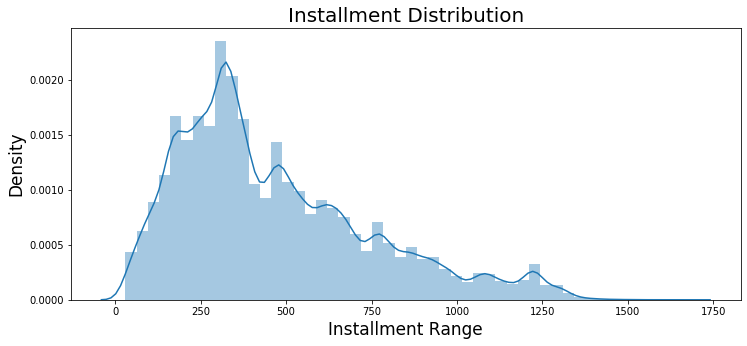

In [38]:
plt.figure(figsize=(12,5))

sns.distplot(model_df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

In [236]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(model_df[purp_loan[0]], model_df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,0.0,1.0
purpose,,
car,0.990000,0.790000
credit_card,27.100000,21.540000
debt_consolidation,51.850000,54.930000
home_improvement,6.760000,6.120000
house,1.040000,1.470000
major_purchase,2.220000,2.660000
medical,1.250000,1.420000
moving,0.620000,0.840000
other,6.630000,8.000000


In [248]:
purp_loan= ['verification_status_joint', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(model_df[purp_loan[0]], model_df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,0.0,1.0
verification_status_joint,,
Not Verified,44.950000,37.630000
Source Verified,34.020000,38.360000
Verified,21.030000,24.000000


[Text(0, 0.5, '(%)')]

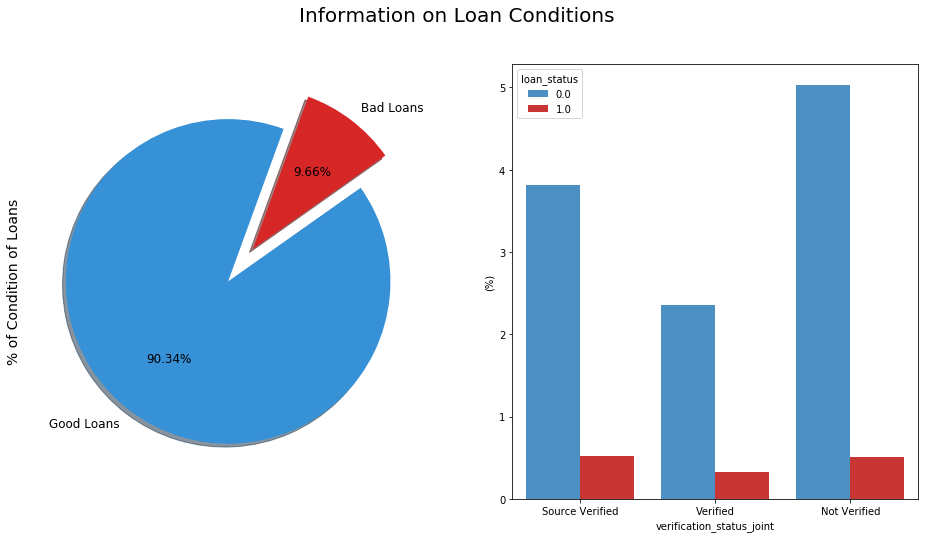

In [249]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels =["Good Loans", "Bad Loans"]

plt.suptitle('Information on Loan Conditions', fontsize=20)

model_df["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="verification_status_joint", y="loan_amnt", hue="loan_status", data=model_df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [39]:
model_df.drop(['id', 'member_id', 'url', 'desc', 'zip_code',"addr_state"], axis=1, inplace=True)
test_df.drop(['id', 'member_id', 'url', 'desc', 'zip_code',"addr_state"], axis=1, inplace=True)

## Feature Engineering

### 同值化处理

In [40]:
def primaryvalue_ratio(data, ratiolimit = 1):
    #按照命中率进行筛选      
    #首先计算每个变量的命中率,这个命中率是指 维度中占比最大的值的占比       
    recordcount = data.shape[0]  #number of row
    x = []
    #循环每一个列，并取出出现频率最大的那个值;index[0]是取列名,iloc[0]是取列名对应的值
    for col in data.columns:
        primaryvalue = data[col].value_counts().index[0]
        ratio = float(data[col].value_counts().iloc[0])/recordcount
        x.append([ratio,primaryvalue])       
    feature_primaryvalue_ratio = pd.DataFrame(x,index = data.columns)
    feature_primaryvalue_ratio.columns = ['primaryvalue_ratio','primaryvalue']

    needcol = feature_primaryvalue_ratio[feature_primaryvalue_ratio['primaryvalue_ratio']<ratiolimit]
    needcol = needcol.reset_index()
    select_data = data[list(needcol['index'])]
    return select_data  

In [41]:
def primaryvalue_ratio(data):
    recordcount = data.shape[0]  #number of row
    x = []
    for col in data.columns:
        primaryvalue = data[col].value_counts().index[0]
        ratio = float(data[col].value_counts().iloc[0])/recordcount
        x.append([primaryvalue,ratio])
    feature_primaryvalue_ratio = pd.DataFrame(x,index = data.columns)
    feature_primaryvalue_ratio.columns = ["primaryvalue","primaryvalue_ratio"]
    return feature_primaryvalue_ratio

In [42]:
d = primaryvalue_ratio(model_df)

In [43]:
d.sort_values(['primaryvalue_ratio'], ascending=[0])

,primaryvalue,primaryvalue_ratio
num_tl_30dpd,0,1.000000
acc_now_delinq,0,1.000000
policy_code,1,1.000000
delinq_amnt,0,0.999807
pymnt_plan,n,0.999551
hardship_flag,N,0.999288
tax_liens,0,0.997625
chargeoff_within_12_mths,0,0.993883
debt_settlement_flag,N,0.991013
collections_12_mths_ex_med,0,0.983673


In [44]:
ratiolimit = 0.91
needcol = d[d['primaryvalue_ratio']<ratiolimit] 
needcol = needcol.reset_index()

In [45]:
model_df2 = model_df[list(needcol['index'])]
model_df2.shape

(300661, 129)

In [46]:
na_table = model_df2.isnull().sum(axis = 0)/model_df2.shape[0]

In [47]:
na_table[na_table>0.9]

sec_app_mths_since_last_major_derog           0.955608
hardship_type                                 0.996631
hardship_reason                               0.996631
hardship_status                               0.996631
deferral_term                                 0.996631
hardship_amount                               0.996631
hardship_start_date                           0.996631
hardship_end_date                             0.996631
payment_plan_start_date                       0.996631
hardship_length                               0.996631
hardship_dpd                                  0.996631
hardship_loan_status                          0.996631
orig_projected_additional_accrued_interest    0.997509
hardship_payoff_balance_amount                0.996631
hardship_last_payment_amount                  0.996631
debt_settlement_flag_date                     0.991013
settlement_status                             0.991013
settlement_date                               0.991013
settlement

I set the critical point as 0.95. Because even though I create a new level for the NA, these variables would have the primary value "NA" with the ratio larger than 95%. 

In [48]:
model_df3 = model_df2.drop(list(na_table[na_table>0.9].index),axis = 1)

In [49]:
model_df3.shape

(300661, 108)

In [50]:
# model_df3.to_csv("model_df3.csv",index=False)

In [51]:
na_table_2 = model_df3.isnull().sum(axis = 0)/model_df3.shape[0]

In [52]:
na_table_2[(na_table_2> 0)]  # for na% in [10%,80%] find the iv>0.02, for na% in [0,10%) impute the missing value

emp_title                             0.102803
emp_length                            0.081687
dti                                   0.002375
mths_since_last_delinq                0.558217
mths_since_last_record                0.876229
revol_util                            0.001147
last_pymnt_d                          0.001257
next_pymnt_d                          0.334663
last_credit_pull_d                    0.000010
mths_since_last_major_derog           0.767436
annual_inc_joint                      0.862869
dti_joint                             0.862869
verification_status_joint             0.874417
mths_since_rcnt_il                    0.037065
il_util                               0.164059
all_util                              0.000246
avg_cur_bal                           0.000073
bc_open_to_buy                        0.012998
bc_util                               0.013397
mo_sin_old_il_acct                    0.037065
mths_since_recent_bc                  0.012253
mths_since_re

#### NA% in [10%,90%]

In [53]:
na_table_2[(na_table_2> 0.1)][(na_table_2<0.9)]

emp_title                             0.102803
mths_since_last_delinq                0.558217
mths_since_last_record                0.876229
next_pymnt_d                          0.334663
mths_since_last_major_derog           0.767436
annual_inc_joint                      0.862869
dti_joint                             0.862869
verification_status_joint             0.874417
il_util                               0.164059
mths_since_recent_bc_dlq              0.802482
mths_since_recent_inq                 0.123611
mths_since_recent_revol_delinq        0.712211
revol_bal_joint                       0.862869
sec_app_fico_range_low                0.862869
sec_app_fico_range_high               0.862869
sec_app_earliest_cr_line              0.862869
sec_app_inq_last_6mths                0.862869
sec_app_mort_acc                      0.862869
sec_app_open_acc                      0.862869
sec_app_revol_util                    0.865220
sec_app_open_act_il                   0.862869
sec_app_num_r

In [57]:
sumivt = pd.read_csv("sumivt.csv")

In [58]:
model_df4 = model_df3.drop(list(sumivt[(sumivt['IV']<0.02)]["Char"]),axis = 1)

In [59]:
model_df4.shape

(300661, 68)

In [60]:
nomeaning = ["emp_title","next_pymnt_d" ,"last_pymnt_d" ,"last_credit_pull_d" ,"sub_grade" ,"title", "earliest_cr_line"]

In [61]:
model_df5 = model_df4.drop(nomeaning,axis = 1)

In [62]:
na_table_3 = model_df5.isnull().sum(axis = 0)/model_df5.shape[0]

In [63]:
na_table_3[(na_table_3>0)]

emp_length                            0.081687
revol_util                            0.001147
mths_since_rcnt_il                    0.037065
il_util                               0.164059
avg_cur_bal                           0.000073
bc_open_to_buy                        0.012998
mo_sin_old_il_acct                    0.037065
mths_since_recent_bc                  0.012253
mths_since_recent_inq                 0.123611
revol_bal_joint                       0.862869
sec_app_earliest_cr_line              0.862869
sec_app_open_acc                      0.862869
sec_app_open_act_il                   0.862869
sec_app_num_rev_accts                 0.862869
sec_app_chargeoff_within_12_mths      0.862869
sec_app_collections_12_mths_ex_med    0.862869
dtype: float64

In [64]:
sumivt[sumivt.IV.isnull()]

,Unnamed: 0,Char,IV,Process
87,5,int_rate,NaN,Too many categories
88,8,sub_grade,NaN,Too many categories
89,9,emp_title,NaN,Values contain comma
90,10,emp_length,NaN,Too many categories
91,15,purpose,NaN,Too many categories
92,16,title,NaN,Too many categories
93,19,earliest_cr_line,NaN,Too many categories
94,28,revol_util,NaN,Too many categories
95,37,last_pymnt_d,NaN,Too many categories
96,40,last_credit_pull_d,NaN,Too many categories


In [65]:
toomanyctg = ["sec_app_earliest_cr_line"]
model_df6 = model_df5.drop(toomanyctg,axis = 1)

In [66]:
no_significant_splits = ["total_cu_tl","num_bc_sats","num_rev_accts",
                         "revol_bal_joint","sec_app_open_acc", 
                         "sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med"]

In [67]:
model_df6 = model_df6.drop(no_significant_splits,axis = 1)

In [68]:
sumivt[sumivt.IV.isnull()].Char

87                               int_rate
88                              sub_grade
89                              emp_title
90                             emp_length
91                                purpose
92                                  title
93                       earliest_cr_line
94                             revol_util
95                           last_pymnt_d
96                     last_credit_pull_d
97                            total_cu_tl
98                            num_bc_sats
99                          num_rev_accts
100                       revol_bal_joint
101              sec_app_earliest_cr_line
102                      sec_app_open_acc
103                   sec_app_open_act_il
104                 sec_app_num_rev_accts
105      sec_app_chargeoff_within_12_mths
106    sec_app_collections_12_mths_ex_med
Name: Char, dtype: object

In [69]:
ctgiv = []
for items in list(sumivt[sumivt.IV.isnull()].Char):
    if items in list(model_df6.columns):
        ctgiv.append(items)
ctgiv

['int_rate',
 'emp_length',
 'purpose',
 'revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts']

In [70]:
# recode the ctg variables
mapping_dict = {"emp_length": 
                   {"10+ years": 11,"9 years": 10,"8 years": 9,
                    "7 years": 8,"6 years": 7,"5 years": 6,"4 years":5,
                    "3 years": 4,"2 years": 3,"1 year": 2,"< 1 year": 1,
                    "n/a": 0},
               "grade":
                   {"A": 0,"B": 1,"C": 2, "D": 3, "E": 4,"F": 5,"G": 6},
               "verification_status":
                   {"Not Verified":0,"Source Verified":1,"Verified":2},
               "purpose":
                   {"credit_card":0,"home_improvement":1,"debt_consolidation":2,       
                    "other":3,"major_purchase":4,"medical":5,"small_business":6,
                    "car":7,"vacation":8,"moving":9, "house":10, 
                    "renewable_energy":11,"wedding":12},
               "home_ownership":
                   {"MORTGAGE":0,"ANY":1,"NONE":2,"OWN":3,"RENT":4}} 
model_df7 = model_df6.replace(mapping_dict) 
test_df = test_df.replace(mapping_dict)

为了计算某个变量的IV，首先需要对其进行分箱。如果强制变量分箱的WOE单调性，这样可能就会低估某些非线性变量的IV值，如U型变量。因此，为了尽可能使得IV值计算最大，同时尽可能保证分箱的单调性（让预测变量对目标变量有更好的解释性），我们利用决策树的信息增益最大化思想来实现变量的最优分箱。

In [71]:
from sklearn.tree import DecisionTreeClassifier
# 获得最优分箱边界值函数的实现：
def optimal_binning_boundary(x: pd.Series, y: pd.Series, nan: float = -999.) -> list:
    '''
        利用决策树获得最优分箱的边界值列表
    '''
    boundary = []  # 待return的分箱边界值列表
    
    x = x.fillna(nan).values  # 填充缺失值
    y = y.values
    
    clf = DecisionTreeClassifier(criterion='entropy',    #“信息熵”最小化准则划分
                                 max_leaf_nodes=6,       # 最大叶子节点数
                                 min_samples_leaf=0.05)  # 叶子节点样本数量最小占比

    clf.fit(x.reshape(-1, 1), y)  # 训练决策树
    
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold
    
    

    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  # 获得决策树节点上的划分边界值
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  # +0.1是为了考虑后续groupby操作时，能包含特征最大值的样本
    boundary = [min_x] + boundary + [max_x]

    return boundary

In [72]:
# 获得某个变量各个分箱的WOE、IV值函数的实现：
def feature_woe_iv(x: pd.Series, y: pd.Series, nan: float = -999.) -> pd.DataFrame:
    '''
        计算变量各个分箱的WOE、IV值，返回一个DataFrame
    '''
    x = x.fillna(nan)
    boundary = optimal_binning_boundary(x, y, nan)        # 获得最优分箱边界值列表
    df = pd.concat([x, y], axis=1)                        # 合并x、y为一个DataFrame，方便后续计算
    df.columns = ['x', 'y']                               # 特征变量、目标变量字段的重命名
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  # 获得每个x值所在的分箱区间
    
    grouped = df.groupby('bins')['y']                     # 统计各分箱区间的好、坏、总客户数量
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])

    result_df['good_pct'] = result_df['good'] / result_df['good'].sum()       # 好客户占比
    result_df['bad_pct'] = result_df['bad'] / result_df['bad'].sum()          # 坏客户占比
    result_df['total_pct'] = result_df['total'] / result_df['total'].sum()    # 总客户占比

    result_df['bad_rate'] = result_df['bad'] / result_df['total']             # 坏比率
    
    result_df['woe'] = np.log(result_df['good_pct'] / result_df['bad_pct'])              # WOE
    result_df['iv'] = (result_df['good_pct'] - result_df['bad_pct']) * result_df['woe']  # IV
    
    print(f"IV = {result_df['iv'].sum()}")
    
    return result_df

In [73]:
ctgiv

['int_rate',
 'emp_length',
 'purpose',
 'revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts']

In [74]:
feature_woe_iv(x=model_df7["int_rate"],y=model_df7['loan_status']) 
# IV = 0.44529951499307385 > 0.02 keep

IV = 0.4435245911337846


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[5.31, 7.9)",66152.0,2058.0,68210,0.243541,0.070880,0.226867,0.030172,1.234296,0.213115
"[7.9, 11.765)",77991.0,5484.0,83475,0.287126,0.188875,0.277638,0.065696,0.418835,0.041151
"[11.765, 15.03)",58174.0,6938.0,65112,0.214169,0.238953,0.216563,0.106555,-0.109499,0.002714
"[15.03, 17.28)",24500.0,3923.0,28423,0.090198,0.135113,0.094535,0.138022,-0.404108,0.018151
"[17.28, 21.37)",28805.0,5937.0,34742,0.106047,0.204477,0.115552,0.170888,-0.656579,0.064628
"[21.37, 31.09)",16004.0,4695.0,20699,0.058919,0.161701,0.068845,0.226823,-1.009584,0.103767


In [75]:
feature_woe_iv(x=model_df7["emp_length"],y=model_df7['loan_status']) 
# IV = 0.02255069557713342 > 0.02 keep

IV = 0.02232218178503688


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[-999.0, -499.0)",21337.0,3223.0,24560,0.078553,0.111004,0.081687,0.131230,-0.345794,0.011221
"[-499.0, 2.5)",40512.0,4798.0,45310,0.149146,0.165249,0.150701,0.105893,-0.102525,0.001651
"[2.5, 3.5)",24545.0,2654.0,27199,0.090363,0.091407,0.090464,0.097577,-0.011484,0.000012
"[3.5, 6.5)",56520.0,6275.0,62795,0.208080,0.216118,0.208856,0.099928,-0.037903,0.000305
"[6.5, 9.5)",31300.0,3261.0,34561,0.115232,0.112313,0.114950,0.094355,0.025660,0.000075
"[9.5, 11.1)",97412.0,8824.0,106236,0.358625,0.303909,0.353341,0.083060,0.165550,0.009058


In [76]:
feature_woe_iv(x=model_df7["purpose"],y=model_df7['loan_status']) 
# IV = 0.021678314362295847 > 0.02 keep

IV = 0.021382872378336887


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[0.0, 0.5)",73601.0,6253.0,79854,0.270964,0.215361,0.265595,0.078305,0.229673,0.012771
"[0.5, 1.5)",18366.0,1777.0,20143,0.067615,0.061202,0.066996,0.088219,0.099650,0.000639
"[1.5, 2.5)",140847.0,15950.0,156797,0.518533,0.549337,0.521508,0.101724,-0.057709,0.001778
"[2.5, 4.5)",24025.0,3096.0,27121,0.088449,0.106630,0.090205,0.114155,-0.186940,0.003399
"[4.5, 11.1)",14787.0,1959.0,16746,0.054439,0.067470,0.055697,0.116983,-0.214610,0.002797


In [77]:
feature_woe_iv(x=model_df7["revol_util"],y=model_df7['loan_status']) 
# IV = 0.0057187858396008364 < 0.02 remove

IV = 0.005585427304718692


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[-999.0, 5.65)",13683.0,1606.0,15289,0.050374,0.055313,0.050851,0.105043,-0.093517,0.000462
"[5.65, 22.65)",49083.0,4557.0,53640,0.180701,0.156949,0.178407,0.084955,0.140924,0.003347
"[22.65, 28.65)",22252.0,2232.0,24484,0.081921,0.076873,0.081434,0.091162,0.063610,0.000321
"[28.65, 50.45)",81520.0,8794.0,90314,0.300119,0.302876,0.300385,0.097371,-0.009145,0.000025
"[50.45, 86.55)",90234.0,10285.0,100519,0.332199,0.354228,0.334327,0.102319,-0.064204,0.001414
"[86.55, 162.2)",14854.0,1561.0,16415,0.054685,0.053763,0.054596,0.095096,0.017018,0.000016


In [78]:
feature_woe_iv(x=model_df7["sec_app_open_act_il"],y=model_df7['loan_status']) 
# IV = 0.0014421769386118045 < 0.02 remove

IV = 0.0014265828902165166


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[-999.0, 1.5)",248035.0,26196.0,274231,0.913149,0.902221,0.912094,0.095525,0.012039,0.000132
"[1.5, 43.1)",23591.0,2839.0,26430,0.086851,0.097779,0.087906,0.107416,-0.118511,0.001295


In [79]:
feature_woe_iv(x=model_df7["sec_app_num_rev_accts"],y=model_df7['loan_status']) 
# IV = 0.0012665823652177432 < 0.02 remove

IV = 0.0012758121386209542


,good,bad,total,good_pct,bad_pct,total_pct,bad_rate,woe,iv
bins,,,,,,,,,
"[-999.0, -499.5)",234698.0,24733.0,259431,0.864048,0.851834,0.862869,0.095336,0.014237,0.000174
"[-499.5, 8.5)",13448.0,1606.0,15054,0.049509,0.055313,0.050070,0.106683,-0.110840,0.000643
"[8.5, 106.1)",23480.0,2696.0,26176,0.086442,0.092853,0.087062,0.102995,-0.071544,0.000459


In [80]:
ctg_rm = ["revol_util","sec_app_open_act_il","sec_app_num_rev_accts"]

In [81]:
model_df8 = model_df7.drop(ctg_rm,axis = 1)

In [82]:
model_df8.shape

(300661, 50)

In [83]:
cols = list(model_df8.columns)
cols.remove("issue_d")
cols.remove("loan_status")

In [84]:
# check
# all the iv > 0.02
x = []
for items in cols:
    iv = feature_woe_iv(x=model_df7[items],y=model_df7['loan_status']) 
    x.append(iv)
x

IV = 0.028328331624278853
IV = 0.028328331624278853
IV = 0.028291313220248866
IV = 0.03695879367122312
IV = 0.4435245911337846
IV = 0.04968827509180361
IV = 0.4232665370643107
IV = 0.02232218178503688
IV = 0.02945562677869648
IV = 0.0234422312252038
IV = 0.055337247361547194
IV = 0.021382872378336887
IV = 0.09360427376575695
IV = 0.09360427376575695
IV = 0.053717131122228326
IV = 0.020710639708185798
IV = 1.3467630040217733
IV = 1.346903347915407
IV = 0.7646020473456179
IV = 0.7644478130853192
IV = 1.7092354397873915
IV = 0.02415707394665096
IV = 1.2740217086532786
IV = 4.407121998183561
IV = 4.407121998183561
IV = 0.03255358467189785
IV = 0.037179621549148195
IV = 0.02271590020430287
IV = 0.024083877393129845
IV = 0.04309029944893518
IV = 0.05885568689937706
IV = 0.03158804653546986
IV = 0.04622171911007495
IV = 0.027100793376303715
IV = 0.06733405495815459
IV = 0.062923130146773
IV = 0.03278798881983635
IV = 0.04632532247983294
IV = 0.025470019740730453
IV = 0.04338428461111417
IV = 

[                        good      bad   total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                                                                                                      
 [1000.0, 4587.5)     23563.0   1763.0   25326  0.086748  0.060720   0.084234  0.069612  0.356737  0.009285
 [4587.5, 9512.5)     52868.0   4774.0   57642  0.194635  0.164422   0.191718  0.082822  0.168690  0.005097
 [9512.5, 19037.5)   103979.0  11066.0  115045  0.382802  0.381126   0.382640  0.096188  0.004387  0.000007
 [19037.5, 27612.5)   48829.0   6008.0   54837  0.179766  0.206923   0.182388  0.109561 -0.140692  0.003821
 [27612.5, 35162.5)   28161.0   4009.0   32170  0.103676  0.138075   0.106998  0.124619 -0.286528  0.009856
 [35162.5, 40000.1)   14226.0   1415.0   15641  0.052373  0.048734   0.052022  0.090467  0.072018  0.000262,
                         good      bad   total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                      

In [85]:
IV_table_py = pd.concat([pd.DataFrame(cols),pd.DataFrame(x)],axis = 1)

In [86]:
na_table_4 = model_df8.isnull().sum(axis = 0)/model_df8.shape[0]

In [87]:
na_table_4[na_table_4>0]

emp_length               0.081687
mths_since_rcnt_il       0.037065
il_util                  0.164059
avg_cur_bal              0.000073
bc_open_to_buy           0.012998
mo_sin_old_il_acct       0.037065
mths_since_recent_bc     0.012253
mths_since_recent_inq    0.123611
dtype: float64

In [88]:
model_df8.emp_length.mode()

0    11.0
dtype: float64

In [89]:
model_df8.emp_length[model_df8.emp_length.isnull()] =11
test_df.emp_length[test_df.emp_length.isnull()] =11

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
model_df8.mths_since_rcnt_il[model_df8.mths_since_rcnt_il.isnull()] = 7
test_df.mths_since_rcnt_il[test_df.mths_since_rcnt_il.isnull()] = 7


/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
model_df8.il_util[model_df8.il_util.isnull()] = 75
test_df.il_util[test_df.il_util.isnull()] = 75

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
model_df8.avg_cur_bal[model_df8.avg_cur_bal.isnull()] = 0
test_df.avg_cur_bal[test_df.avg_cur_bal.isnull()] = 0

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
model_df8.bc_open_to_buy[model_df8.bc_open_to_buy.isnull()] = 0
test_df.bc_open_to_buy[test_df.bc_open_to_buy.isnull()] = 0

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
model_df8.mo_sin_old_il_acct[model_df8.mo_sin_old_il_acct.isnull()] = 143
test_df.mo_sin_old_il_acct[test_df.mo_sin_old_il_acct.isnull()] = 143

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
model_df8.mths_since_recent_bc[model_df8.mths_since_recent_bc.isnull()] = 2
test_df.mths_since_recent_bc[test_df.mths_since_recent_bc.isnull()] = 2

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
model_df8.mths_since_recent_inq[model_df8.mths_since_recent_inq.isnull()] = 1
test_df.mths_since_recent_inq[test_df.mths_since_recent_inq.isnull()] = 1

/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
na_table_4 = model_df8.isnull().sum(axis = 0)/model_df8.shape[0]
na_table_4[na_table_4>0]

Series([], dtype: float64)

In [98]:
# test_df.mths_since_recent_inq.isnull().sum()

### After impute the missing values, recalculate the importance value

In [99]:
# check
# all the iv > 0.02
cols = list(model_df8.columns)
cols.remove("issue_d")
cols.remove("loan_status")
x = []
for items in cols:
    iv = feature_woe_iv(x=model_df8[items],y=model_df8['loan_status']) 
    x.append(iv)
x

IV = 0.028328331624278853
IV = 0.028328331624278853
IV = 0.028291313220248866
IV = 0.03695879367122312
IV = 0.4435245911337846
IV = 0.04968827509180361
IV = 0.4232665370643107
IV = 0.003291817587242932
IV = 0.02945562677869648
IV = 0.0234422312252038
IV = 0.055337247361547194
IV = 0.021382872378336887
IV = 0.09360427376575695
IV = 0.09360427376575695
IV = 0.053717131122228326
IV = 0.020710639708185798
IV = 1.3467630040217733
IV = 1.346903347915407
IV = 0.7646020473456179
IV = 0.7644478130853192
IV = 1.7092354397873915
IV = 0.02415707394665096
IV = 1.2740217086532786
IV = 4.407121998183561
IV = 4.407121998183561
IV = 0.03255358467189785
IV = 0.037179621549148195
IV = 0.022276068111379665
IV = 0.023010862266116483
IV = 0.04309029944893518
IV = 0.05885568689937706
IV = 0.03158804653546986
IV = 0.04622171911007495
IV = 0.027100793376303715
IV = 0.06733405495815459
IV = 0.062923130146773
IV = 0.03278798881983635
IV = 0.04632532247983294
IV = 0.02259175826623698
IV = 0.04338428461111417
IV =

[                        good      bad   total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                                                                                                      
 [1000.0, 4587.5)     23563.0   1763.0   25326  0.086748  0.060720   0.084234  0.069612  0.356737  0.009285
 [4587.5, 9512.5)     52868.0   4774.0   57642  0.194635  0.164422   0.191718  0.082822  0.168690  0.005097
 [9512.5, 19037.5)   103979.0  11066.0  115045  0.382802  0.381126   0.382640  0.096188  0.004387  0.000007
 [19037.5, 27612.5)   48829.0   6008.0   54837  0.179766  0.206923   0.182388  0.109561 -0.140692  0.003821
 [27612.5, 35162.5)   28161.0   4009.0   32170  0.103676  0.138075   0.106998  0.124619 -0.286528  0.009856
 [35162.5, 40000.1)   14226.0   1415.0   15641  0.052373  0.048734   0.052022  0.090467  0.072018  0.000262,
                         good      bad   total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                      

In [100]:
model_df8 = model_df8.drop("emp_length",axis = 1)

### 逻辑回归对于相关性比较高的变量很敏感，所以要计算相关性。

In [101]:
cor_table = model_df8.corr()
cor_table

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,fico_range_low,fico_range_high,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_cur_bal,open_acc_6m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_tl_op_past_12m,tot_hi_cred_lim,total_bc_limit
loan_amnt,1.000000,1.000000,0.999996,0.381267,0.000050,0.943090,0.004098,-0.161553,0.240145,0.204313,0.037055,-0.069243,0.099191,0.099189,-0.015485,0.310423,0.623276,0.623283,0.752851,0.752903,0.617048,0.698072,0.263087,0.083983,0.063065,0.280083,-0.022181,-0.000336,-0.069845,-0.042155,-0.033950,0.346492,0.334730,-0.021323,0.011134,-0.003692,0.201443,0.213160,0.108058,0.147139,0.042356,0.030405,0.206508,0.029844,-0.012239,-0.025433,0.310938,0.354825
funded_amnt,1.000000,1.000000,0.999996,0.381267,0.000050,0.943090,0.004098,-0.161553,0.240145,0.204313,0.037055,-0.069243,0.099191,0.099189,-0.015485,0.310423,0.623276,0.623283,0.752851,0.752903,0.617048,0.698072,0.263087,0.083983,0.063065,0.280083,-0.022181,-0.000336,-0.069845,-0.042155,-0.033950,0.346492,0.334730,-0.021323,0.011134,-0.003692,0.201443,0.213160,0.108058,0.147139,0.042356,0.030405,0.206508,0.029844,-0.012239,-0.025433,0.310938,0.354825
funded_amnt_inv,0.999996,0.999996,1.000000,0.381479,0.000139,0.943016,0.004176,-0.161600,0.240145,0.204320,0.037065,-0.069237,0.099279,0.099278,-0.015521,0.310422,0.623334,0.623345,0.752799,0.752858,0.616974,0.698128,0.263081,0.084004,0.063075,0.280118,-0.022198,-0.000331,-0.069840,-0.042183,-0.033989,0.346501,0.334752,-0.021331,0.011117,-0.003723,0.201480,0.213200,0.108068,0.147146,0.042384,0.030423,0.206542,0.029864,-0.012233,-0.025452,0.310977,0.354850
term,0.381267,0.381267,0.381479,1.000000,0.319033,0.127028,0.322034,-0.108950,0.038782,0.114953,0.058401,-0.017721,0.025345,0.025344,0.004587,0.079451,0.432654,0.432757,0.137026,0.137226,-0.000250,0.519043,0.073857,-0.024781,-0.020472,0.109318,0.005960,-0.025607,0.025778,-0.019921,-0.018859,0.089957,0.074202,0.016232,0.033006,0.020881,0.084649,0.026721,0.066773,0.045107,0.020857,-0.002508,0.106498,0.025165,-0.020161,0.011957,0.108184,0.066577
int_rate,0.000050,0.000050,0.000139,0.319033,1.000000,0.043859,0.972205,0.076086,-0.064680,0.212044,0.194807,0.122023,-0.448948,-0.448942,0.114189,-0.023820,0.024823,0.024864,-0.000772,-0.000690,-0.131657,0.439770,0.020617,-0.398187,-0.308048,-0.073051,0.087316,-0.075884,0.105619,0.069193,0.072592,-0.054770,-0.218316,0.122394,0.122826,0.110564,-0.069358,-0.326407,-0.041817,-0.120691,-0.053005,-0.077172,-0.114179,-0.047496,-0.054648,0.110673,-0.120202,-0.261110
installment,0.943090,0.943090,0.943016,0.127028,0.043859,1.000000,0.041346,-0.125570,0.233824,0.207744,0.052040,-0.060808,0.030809,0.030808,-0.001678,0.300250,0.507644,0.507617,0.777400,0.777392,0.656994,0.648519,0.265954,0.042148,0.031544,0.248992,-0.012667,-0.003960,-0.069959,-0.026465,-0.016204,0.332119,0.298735,-0.010348,0.019422,0.008300,0.174033,0.168509,0.086670,0.124471,0.028086,0.020767,0.164466,0.013580,-0.012495,-0.013608,0.275381,0.316866
grade,0.004098,0.004098,0.004176,0.322034,0.972205,0.041346,1.000000,0.072399,-0.062650,0.209611,0.192209,0.121129,-0.450719,-0.450712,0.112346,-0.022539,0.025548,0.025584,0.003953,0.004025,-0.124979,0.434595,0.020866,-0.396488,-0.306648,-0.069954,0.084867,-0.070431,0.104759,0.070473,0.074561,-0.054351,-0.215559,0.119602,0.122312,0.109830,-0.065801,-0.323210,-0.039000,-0.116984,-0.052462,-0.073923,-0.109474,-0.046232,-0.054208,0.109574,-0.116906,-0.258305
home_ownership,-0.161553,-0.161553,-0.161600,-0.108950,0.076086,-0.125570,0.072399,1.000000,-0.122181,-0.071678,0.050322,

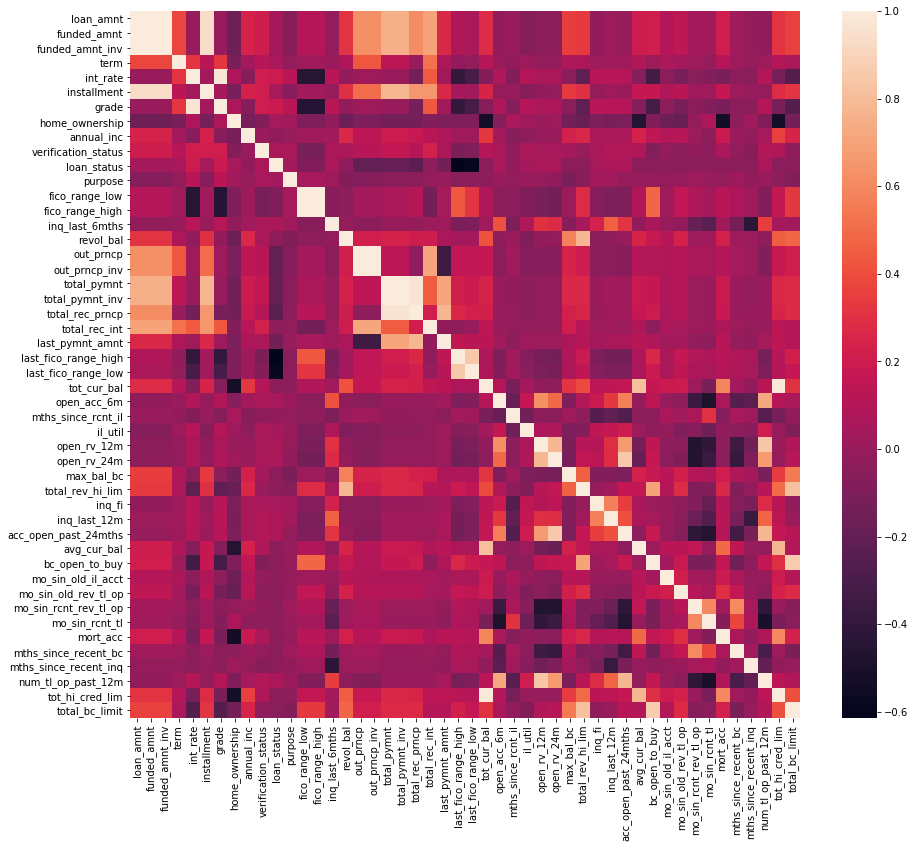

In [102]:
f, ax = plt.subplots(figsize=(15, 13))

sns.heatmap(model_df8.corr())

#### loan_amnt, funded_amnt, funded_amnt_inv, installment are highly correlated. I keep loan_amnt, and remove funded_amnt and funded_amnt_inv because loan amount is more related to loan status.

In [103]:
cor_table[["loan_amnt","funded_amnt","funded_amnt_inv","installment","loan_status"]]
model_df9 = model_df8.drop(["funded_amnt","funded_amnt_inv","installment"],axis = 1)

out_prncp: Remaining outstanding principal for total amount funded 剩余未偿还本金总额
total_rec_prncp: Principal received to date
loan_amnt: The total amount committed by investors for that loan at that point in time.
**loan_amnt = out_prncp + total_rec_prncp**
*out_prncp and total_rec_prncp are more meaningful than loan_amnt. They are changing by interest, time. Also they reveal the infomation of the loan amount.*

installment: The monthly payment owed by the borrower if the loan originates.
total_pymnt: Payments received to date for total amount funded

funded_amnt: The total amount committed to that loan at that point in time.	
funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

total_rec_int: Interest received to date

In [104]:
cor_table[["loan_amnt","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","loan_status"]]
#keep 
model_df9 = model_df9.drop(["loan_amnt","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",           "total_rec_int"],axis = 1)

In [105]:
cor_table[['int_rate',"grade"]] 
#keep int_rate
model_df9 = model_df9.drop(["grade"],axis = 1)

In [106]:
# fico_range_high and fico_range_low
cor_table[['fico_range_high',"fico_range_low"]] 
#keep fico_range_low
model_df9 = model_df9.drop(["fico_range_high"],axis = 1)

In [107]:
# total_rev_hi_lim and revol_bal
cor_table[['total_rev_hi_lim',"revol_bal"]] 
#keep total_rev_hi_lim
model_df9 = model_df9.drop(["revol_bal"],axis = 1)

In [108]:
# last_pymnt_amnt and total_rec_prncp
cor_table[['last_pymnt_amnt',"total_rec_prncp"]] 
#keep total_rec_prncp
model_df9 = model_df9.drop(["last_pymnt_amnt"],axis = 1)

In [109]:
# last_fico_range_high and last_fico_range_low
cor_table[['last_fico_range_high',"last_fico_range_low"]] 
#keep last_fico_range_low, b/c last_fico_range_high is more correlated with other variables
model_df9 = model_df9.drop(["last_fico_range_high"],axis = 1)

In [110]:
# tot_cur_bal and avg_cur_bal tot_hi_cred_lim
cor_table[['tot_cur_bal',"avg_cur_bal","tot_hi_cred_lim"]] 

# tot_cur_bal : Total current balance of all accounts
# avg_cur_bal : Average current balance of all accounts
# tot_hi_cred_lim : Total high credit/credit limitv

#keep avg_cur_bal, 
model_df9 = model_df9.drop(["tot_cur_bal","tot_hi_cred_lim"],axis = 1)

In [111]:
# open_acc_6m and open_rv_12m open_rv_24m acc_open_past_24mths num_tl_op_past_12m
cor_table[['open_acc_6m',"open_rv_12m","open_rv_24m","acc_open_past_24mths","num_tl_op_past_12m"]] 

# open_acc_6m : Number of open trades in last 6 months
# open_rv_12m : Number of revolving trades opened in past 12 months
# open_rv_24m : Number of revolving trades opened in past 24 months   
# acc_open_past_24mths : Number of trades opened in past 24 months. 过去24个月交易数目
# num_tl_op_past_12m : Number of accounts opened in past 12 months

#revolving is mreo related to credit.

#keep acc_open_past_24mths
model_df9 = model_df9.drop(['open_acc_6m',"open_rv_12m","open_rv_24m","num_tl_op_past_12m"],axis = 1)

In [112]:
# total_rev_hi_lim bc_open_to_buy total_bc_limit
cor_table[['total_rev_hi_lim',"bc_open_to_buy","total_bc_limit"]] 

# total_rev_hi_lim : Total revolving high credit/credit limit . iv = 0.046673
# bc_open_to_buy : Total open to buy on revolving bankcards.    iv = 0.046496
# total_bc_limit : Total bankcard high credit/credit limit      iv = 0.052544

#keep total_bc_limit
model_df9 = model_df9.drop(['total_rev_hi_lim',"bc_open_to_buy"],axis = 1)

In [113]:
# mo_sin_rcnt_rev_tl_op and  mths_since_recent_bc
cor_table[['mo_sin_rcnt_rev_tl_op',"mths_since_recent_bc"]] 

# mo_sin_rcnt_rev_tl_op: Months since most recent revolving account opened . iv = 0.035350
# mths_since_recent_bc : Months since most recent bankcard account opened.    iv = 0.036084

#keep mths_since_recent_bc
model_df9 = model_df9.drop(['mo_sin_rcnt_rev_tl_op'],axis = 1)

In [114]:
corr_table2 = model_df9.corr() 
corr_table2 > 0.6

,term,int_rate,home_ownership,annual_inc,verification_status,loan_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit
term,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
int_rate,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
home_ownership,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
verification_status,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
loan_status,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
purpose,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fico_range_low,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total_rec_prncp,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
model_df9.shape

(300661, 26)

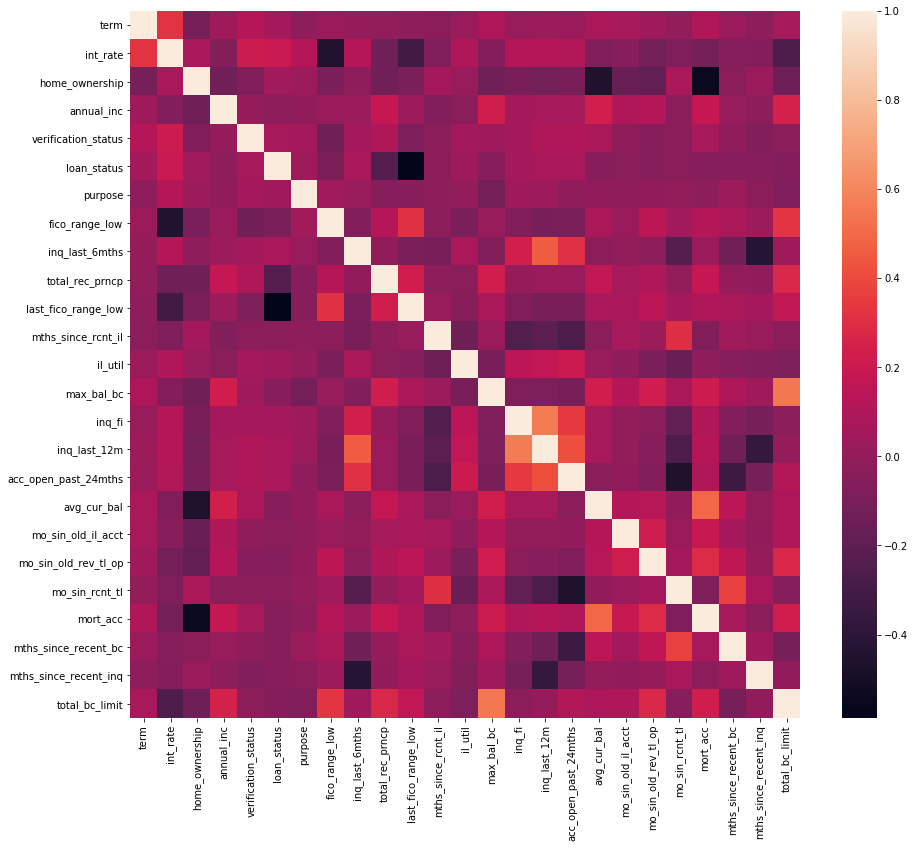

In [116]:
f, ax = plt.subplots(figsize=(15, 13))

sns.heatmap(model_df9.corr())

一般情况下，当Pearson相关系数低于0.4，则表明变量之间存在弱相关关系；当Pearson相关系数在0.4~0.6之间，则说明变量之间存在中度相关关系；当相关系数在0.6以上时，则反映变量之间存在强相关关系。经过对比发现，PE与RH之间的为弱相关关系，故不考虑将该变量纳入模型。当然，变量之间不存在线性关系并不代表不存在任何关系，可能是二次函数关系、对数关系等，所以一般还需要进行检验和变量转换。

In [117]:
cols = list(model_df9.columns)
cols.remove("issue_d")
cols.remove("loan_status")

In [118]:
# check
# all the iv > 0.02
x = []
for items in cols:
    iv = feature_woe_iv(x=model_df9[items],y=model_df9['loan_status']) 
    x.append(iv)
x

IV = 0.03695879367122312
IV = 0.4435245911337846
IV = 0.02945562677869648
IV = 0.0234422312252038
IV = 0.055337247361547194
IV = 0.021382872378336887
IV = 0.09360427376575695
IV = 0.053717131122228326
IV = 1.7092354397873915
IV = 4.407121998183561
IV = 0.022276068111379665
IV = 0.023010862266116483
IV = 0.03158804653546986
IV = 0.027100793376303715
IV = 0.06733405495815459
IV = 0.062923130146773
IV = 0.03278798881983635
IV = 0.02259175826623698
IV = 0.04338428461111417
IV = 0.033560600854532635
IV = 0.03582041926108724
IV = 0.03598376540191588
IV = 0.03811108008394342
IV = 0.05242339975670846


[                  good      bad   total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                                                                                                
 [36.0, 48.0)  192043.0  17893.0  209936  0.707013  0.616256   0.698248  0.085231  0.137386  0.012469
 [48.0, 60.1)   79583.0  11142.0   90725  0.292987  0.383744   0.301752  0.122811 -0.269845  0.024490,
                     good     bad  total  good_pct   bad_pct  total_pct  bad_rate       woe        iv
 bins                                                                                                
 [5.31, 7.9)      66152.0  2058.0  68210  0.243541  0.070880   0.226867  0.030172  1.234296  0.213115
 [7.9, 11.765)    77991.0  5484.0  83475  0.287126  0.188875   0.277638  0.065696  0.418835  0.041151
 [11.765, 15.03)  58174.0  6938.0  65112  0.214169  0.238953   0.216563  0.106555 -0.109499  0.002714
 [15.03, 17.28)   24500.0  3923.0  28423  0.090198  0.135113   0.094535  0.138022

In [119]:
# only keep used variables in test dataset
cols = list(model_df9.columns)
cols.remove("issue_d")
test_data = test_df[cols]

In [120]:
test_data.isnull().sum()

term                     0
int_rate                 0
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
fico_range_low           0
inq_last_6mths           0
total_rec_prncp          0
last_fico_range_low      0
mths_since_rcnt_il       0
il_util                  0
max_bal_bc               0
inq_fi                   0
inq_last_12m             0
acc_open_past_24mths     0
avg_cur_bal              0
mo_sin_old_il_acct       0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_tl           0
mort_acc                 0
mths_since_recent_bc     0
mths_since_recent_inq    0
total_bc_limit           0
dtype: int64

### WOE encoding

WOE取代属性变量的原始值{0,1,2,3...}

In [121]:
data = model_df9
y = 'loan_status'
cols.remove("loan_status")

In [122]:
new_dataframe = pd.DataFrame()
test_dataframe = pd.DataFrame()
# term
items = cols[0]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03695879367122312


In [123]:
# int_rate
items = cols[1]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.4435245911337846


In [124]:
# home_ownership
items = cols[2]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.02945562677869648


In [125]:
# annual_inc
items = cols[3]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.0234422312252038


In [126]:
# verification_status
items = cols[4]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.055337247361547194


In [127]:
# purpose
items = cols[5]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.021382872378336887


In [128]:
# fico_range_low
items = cols[6]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.09360427376575695


In [129]:
# inq_last_6mths
items = cols[7]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.053717131122228326


In [130]:
# total_rec_prncp
items = cols[8]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 1.7092354397873915


In [131]:
# last_fico_range_low
items = cols[9]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 4.407121998183561


In [132]:
# mths_since_rcnt_il
items = cols[10]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.022276068111379665


In [133]:
items = cols[10]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
print(bins)
print(group_name)

IV = 0.022276068111379665
[-6e-08, 7.5, 11.5, 14.5, 25.5, 50.5, 478.1]
bins
[0.0, 7.5)      -0.183887
[7.5, 11.5)     -0.063315
[11.5, 14.5)     0.028876
[14.5, 25.5)     0.130576
[25.5, 50.5)     0.208864
[50.5, 478.1)    0.133975
Name: woe, dtype: float64


In [134]:
# il_util
items = cols[11]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.023010862266116483


In [135]:
# max_bal_bc
items = cols[12]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03158804653546986


In [136]:
# inq_fi
items = cols[13]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.027100793376303715


In [137]:
# inq_last_12m
items = cols[14]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.06733405495815459


In [138]:
# acc_open_past_24mths
items = cols[15]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.062923130146773


In [139]:
# avg_cur_bal
items = cols[16]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03278798881983635


In [140]:
# mo_sin_old_il_acct
items = cols[17]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.02259175826623698


In [141]:
# mo_sin_old_rev_tl_op
items = cols[18]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.04338428461111417


In [142]:
# mo_sin_rcnt_tl
items = cols[19]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.033560600854532635


In [143]:
# mort_acc
items = cols[20]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03582041926108724


In [144]:
# mths_since_recent_bc
items = cols[21]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03598376540191588


In [145]:
# mths_since_recent_inq
items = cols[22]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.03811108008394342


In [146]:
# total_bc_limit
items = cols[23]
iv_table = feature_woe_iv(x = data[items],y=data[y])
iv = list(iv_table.index)
bins = list()
for i in range(len(iv)):
    if i == 0:
        bins.append(iv_table.index[i].left)
        bins.append(iv_table.index[i].right)
    else:
        bins.append(iv_table.index[i].right)
    bins[0] = bins[0] - 0.00000001
    group_name = iv_table.woe
box = pd.cut(data[items], bins,labels = group_name)
new_dataframe = pd.concat([new_dataframe,box],axis = 1,ignore_index = True)
test_box = pd.cut(test_data[items], bins,labels = group_name)
test_dataframe = pd.concat([test_dataframe,test_box],axis = 1,ignore_index = True)

IV = 0.05242339975670846


In [147]:
train_data = pd.concat([new_dataframe,model_df9["loan_status"]],axis = 1,ignore_index = True)
test_y = test_data["loan_status"]
test_data2 = pd.concat([test_dataframe,test_y],axis = 1,ignore_index = True)

In [148]:
cols = list(model_df9.columns)
cols.remove("issue_d")
cols.remove("loan_status")
cols.append("loan_status")

In [149]:
train_data.columns = cols
test_data2.columns = cols

In [150]:
train_data.head()

,term,int_rate,home_ownership,annual_inc,verification_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit,loan_status
0,0.137386,-0.404108,-0.181227,-0.109014,-0.343662,-0.214610,-0.049644,-0.208797,0.315835,1.899904,0.130576,-0.185636,-0.212223,-0.436221,-0.059140,0.194409,0.077188,-0.027548,-0.001356,0.311350,-0.169736,0.004815,-0.420778,-0.309269,0.0
1,0.137386,-0.109499,-0.181227,-0.008937,-0.044895,-0.057709,-0.185771,0.165715,1.728343,2.804521,0.130576,-0.072365,0.032764,0.121924,0.322033,0.194409,0.077188,0.090409,0.106665,0.062216,-0.169736,-0.148660,0.273534,-0.091402,0.0
2,0.137386,1.234296,-0.181227,-0.008937,-0.044895,-0.057709,0.616673,-0.208797,3.286869,2.804521,-0.183887,0.080990,0.277523,-0.436221,-0.467592,-0.002256,-0.134722,-0.027548,-0.001356,-0.039868,-0.169736,-0.054487,-0.420778,0.195465,0.0
3,-0.269845,-0.656579,-0.181227,-0.109014,-0.044895,-0.057709,-0.327783,-0.208797,1.728343,1.339386,0.133975,-0.072365,-0.078369,0.121924,0.103468,-0.002256,-0.134722,0.158169,0.235689,-0.039868,-0.169736,0.004815,-0.060341,-0.198141,0.0
4,-0.269845,-1.009584,-0.181227,-0.230536,-0.044895,-0.186940,-0.185771,0.165715,-0.359247,2.804521,-0.063315,-0.071423,-0.212223,0.121924,0.103468,-0.002256,-0.134722,0.090409,-0.222523,0.062216,-0.169736,0.004815,0.108016,-0.198141,0.0


In [151]:
# x      # use to check the WOE

In [152]:
test_data2.isnull().sum()
# for mths_since_rcnt_il, il_util, avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op, mort_acc, values are out of bins range. Therefore, we just treat them as the closest WOE.

term                     0
int_rate                 0
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
fico_range_low           0
inq_last_6mths           0
total_rec_prncp          0
last_fico_range_low      0
mths_since_rcnt_il       1
il_util                  1
max_bal_bc               0
inq_fi                   0
inq_last_12m             0
acc_open_past_24mths     0
avg_cur_bal              1
mo_sin_old_il_acct       3
mo_sin_old_rev_tl_op     1
mo_sin_rcnt_tl           0
mort_acc                 3
mths_since_recent_bc     0
mths_since_recent_inq    0
total_bc_limit           0
loan_status              0
dtype: int64

In [153]:
train_data = train_data.astype('float')
test_data2 = test_data2.astype('float')


In [154]:
test_data2.mths_since_rcnt_il[test_data2.mths_since_rcnt_il.isnull()] = 0.133975

In [155]:
test_data2.il_util[test_data2.il_util.isnull()] = -0.071423

In [156]:
#avg_cur_bal              1
test_data2.avg_cur_bal[test_data2.avg_cur_bal.isnull()] = 0.307023

In [157]:
#mo_sin_old_il_acct       3
test_data2.mo_sin_old_il_acct[test_data2.mo_sin_old_il_acct.isnull()]  = -0.314424

In [158]:
#mo_sin_old_rev_tl_op     1
test_data2.mo_sin_old_rev_tl_op[test_data2.mo_sin_old_rev_tl_op.isnull()]  = 0.235689

In [159]:
#mort_acc                 3
test_data2.mort_acc[test_data2.mort_acc.isnull()]   =  0.368525

In [160]:
test_data2.head()

,term,int_rate,home_ownership,annual_inc,verification_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit,loan_status
0,0.137386,-0.109499,-0.181227,-0.109014,-0.343662,-0.057709,-0.049644,0.165715,-0.359247,-2.046039,-0.183887,-0.072365,-0.212223,0.121924,0.322033,0.344505,-0.348719,-0.142569,-0.222523,0.311350,-0.169736,0.391166,0.042155,-0.309269,0.0
1,0.137386,0.418835,0.184679,-0.008937,-0.044895,-0.186940,0.616673,-0.208797,-0.359247,2.804521,-0.183887,-0.185636,-0.212223,-0.092399,-0.220819,-0.457215,0.077188,0.158169,-0.001356,-0.239381,0.273682,-0.054487,-0.060341,0.422475,0.0
2,0.137386,1.234296,-0.181227,-0.008937,-0.044895,0.229673,0.616673,0.165715,0.830746,2.804521,-0.183887,0.243695,-0.212223,0.121924,-0.059140,-0.002256,-0.040572,0.158169,-0.001356,-0.239381,-0.169736,0.144913,-0.213215,-0.198141,0.0
3,-0.269845,-0.656579,0.184679,0.091240,-0.044895,-0.057709,-0.327783,-0.488344,-2.035302,2.804521,-0.183887,-0.185636,0.129696,0.121924,-0.302118,-0.457215,0.307023,0.090409,0.106665,-0.239381,0.273682,0.144913,-0.060341,-0.091402,0.0
4,-0.269845,-0.109499,-0.181227,0.197378,-0.044895,0.229673,-0.327783,0.165715,0.315835,1.899904,-0.183887,0.243695,0.277523,0.121924,0.322033,-0.002256,0.077188,0.090409,-0.001356,-0.039868,-0.169736,0.004815,0.273534,0.040624,0.0


In [161]:
model_df9.head()
model_df10 = model_df9.drop(["issue_d"],axis = 1)

In [162]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = train_data._get_numeric_data() #This line will drop non-numeric cols

df.head()


,term,int_rate,home_ownership,annual_inc,verification_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit,loan_status
0,0.137386,-0.404108,-0.181227,-0.109014,-0.343662,-0.214610,-0.049644,-0.208797,0.315835,1.899904,0.130576,-0.185636,-0.212223,-0.436221,-0.059140,0.194409,0.077188,-0.027548,-0.001356,0.311350,-0.169736,0.004815,-0.420778,-0.309269,0.0
1,0.137386,-0.109499,-0.181227,-0.008937,-0.044895,-0.057709,-0.185771,0.165715,1.728343,2.804521,0.130576,-0.072365,0.032764,0.121924,0.322033,0.194409,0.077188,0.090409,0.106665,0.062216,-0.169736,-0.148660,0.273534,-0.091402,0.0
2,0.137386,1.234296,-0.181227,-0.008937,-0.044895,-0.057709,0.616673,-0.208797,3.286869,2.804521,-0.183887,0.080990,0.277523,-0.436221,-0.467592,-0.002256,-0.134722,-0.027548,-0.001356,-0.039868,-0.169736,-0.054487,-0.420778,0.195465,0.0
3,-0.269845,-0.656579,-0.181227,-0.109014,-0.044895,-0.057709,-0.327783,-0.208797,1.728343,1.339386,0.133975,-0.072365,-0.078369,0.121924,0.103468,-0.002256,-0.134722,0.158169,0.235689,-0.039868,-0.169736,0.004815,-0.060341,-0.198141,0.0
4,-0.269845,-1.009584,-0.181227,-0.230536,-0.044895,-0.186940,-0.185771,0.165715,-0.359247,2.804521,-0.063315,-0.071423,-0.212223,0.121924,0.103468,-0.002256,-0.134722,0.090409,-0.222523,0.062216,-0.169736,0.004815,0.108016,-0.198141,0.0


In [163]:

# For each X, calculate VIF and save in dataframe

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif["features"] = df.columns

In [164]:
vif

,VIF Factor,features
0,1.251607,term
1,2.012844,int_rate
2,1.908734,home_ownership
3,1.541986,annual_inc
4,1.113668,verification_status
5,1.092424,purpose
6,1.647129,fico_range_low
7,1.649702,inq_last_6mths
8,1.582281,total_rec_prncp
9,1.763397,last_fico_range_low


### Therefore, we keep all the variables. Use *train_data* to build models

## Logistic Regression
既然woe化是和逻辑回归的式子是紧密联系的，那么这也说明woe化是不能用在其他算法(不包括树模型)中的

In [165]:
range(train_data.shape[1])


range(0, 25)

In [166]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

X_train = train_data.drop(['loan_status'], axis = 1)
y_train = train_data.loan_status

X_test = test_data2.drop(['loan_status'], axis = 1)
y_test = test_data2.loan_status

In [167]:
X_train.head()

,term,int_rate,home_ownership,annual_inc,verification_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit
0,0.137386,-0.404108,-0.181227,-0.109014,-0.343662,-0.214610,-0.049644,-0.208797,0.315835,1.899904,0.130576,-0.185636,-0.212223,-0.436221,-0.059140,0.194409,0.077188,-0.027548,-0.001356,0.311350,-0.169736,0.004815,-0.420778,-0.309269
1,0.137386,-0.109499,-0.181227,-0.008937,-0.044895,-0.057709,-0.185771,0.165715,1.728343,2.804521,0.130576,-0.072365,0.032764,0.121924,0.322033,0.194409,0.077188,0.090409,0.106665,0.062216,-0.169736,-0.148660,0.273534,-0.091402
2,0.137386,1.234296,-0.181227,-0.008937,-0.044895,-0.057709,0.616673,-0.208797,3.286869,2.804521,-0.183887,0.080990,0.277523,-0.436221,-0.467592,-0.002256,-0.134722,-0.027548,-0.001356,-0.039868,-0.169736,-0.054487,-0.420778,0.195465
3,-0.269845,-0.656579,-0.181227,-0.109014,-0.044895,-0.057709,-0.327783,-0.208797,1.728343,1.339386,0.133975,-0.072365,-0.078369,0.121924,0.103468,-0.002256,-0.134722,0.158169,0.235689,-0.039868,-0.169736,0.004815,-0.060341,-0.198141
4,-0.269845,-1.009584,-0.181227,-0.230536,-0.044895,-0.186940,-0.185771,0.165715,-0.359247,2.804521,-0.063315,-0.071423,-0.212223,0.121924,0.103468,-0.002256,-0.134722,0.090409,-0.222523,0.062216,-0.169736,0.004815,0.108016,-0.198141


In [168]:
from sklearn.linear_model import LogisticRegression


In [169]:
lr = LogisticRegression(C=1000.0, random_state=0)


In [170]:
from sklearn.linear_model.logistic import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/Users/yantong/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
X_test.head()

,term,int_rate,home_ownership,annual_inc,verification_status,purpose,fico_range_low,inq_last_6mths,total_rec_prncp,last_fico_range_low,mths_since_rcnt_il,il_util,max_bal_bc,inq_fi,inq_last_12m,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,total_bc_limit
0,0.137386,-0.109499,-0.181227,-0.109014,-0.343662,-0.057709,-0.049644,0.165715,-0.359247,-2.046039,-0.183887,-0.072365,-0.212223,0.121924,0.322033,0.344505,-0.348719,-0.142569,-0.222523,0.311350,-0.169736,0.391166,0.042155,-0.309269
1,0.137386,0.418835,0.184679,-0.008937,-0.044895,-0.186940,0.616673,-0.208797,-0.359247,2.804521,-0.183887,-0.185636,-0.212223,-0.092399,-0.220819,-0.457215,0.077188,0.158169,-0.001356,-0.239381,0.273682,-0.054487,-0.060341,0.422475
2,0.137386,1.234296,-0.181227,-0.008937,-0.044895,0.229673,0.616673,0.165715,0.830746,2.804521,-0.183887,0.243695,-0.212223,0.121924,-0.059140,-0.002256,-0.040572,0.158169,-0.001356,-0.239381,-0.169736,0.144913,-0.213215,-0.198141
3,-0.269845,-0.656579,0.184679,0.091240,-0.044895,-0.057709,-0.327783,-0.488344,-2.035302,2.804521,-0.183887,-0.185636,0.129696,0.121924,-0.302118,-0.457215,0.307023,0.090409,0.106665,-0.239381,0.273682,0.144913,-0.060341,-0.091402
4,-0.269845,-0.109499,-0.181227,0.197378,-0.044895,0.229673,-0.327783,0.165715,0.315835,1.899904,-0.183887,0.243695,0.277523,0.121924,0.322033,-0.002256,0.077188,0.090409,-0.001356,-0.039868,-0.169736,0.004815,0.273534,0.040624


In [172]:
predictions = classifier.predict(X_test)

In [187]:
predictions

array([0., 0., 0., ..., 0., 1., 0.])

In [173]:
pred_y = pd.DataFrame(predictions)

In [174]:
pred_y[0].value_counts()

0.0    116342
1.0      7351
Name: 0, dtype: int64

In [175]:
pd.DataFrame(y_train)["loan_status"].value_counts()

0.0    271626
1.0     29035
Name: loan_status, dtype: int64

In [176]:
# 评估精度

In [177]:
from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(y_test, predictions))


Accuracy: 0.9632719717364766


In [178]:
classifier.coef_

array([[-0.84027409,  0.04005011, -0.26687839,  0.5684114 , -0.98889316,
         0.08208929,  1.08511318, -0.06464444, -0.81208435, -0.97168548,
         0.08158427, -0.20387519,  0.54019914,  0.02656123, -0.23141449,
        -0.2815714 , -0.2857684 ,  0.08901147,  0.92610347,  0.09502043,
         0.19040817, -0.01618748, -0.04709095,  1.0200003 ]])

In [179]:
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
from sklearn import metrics

In [181]:
predslog = classifier.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test,predslog, average='macro', sample_weight=None)

0.9424998725000843

In [182]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

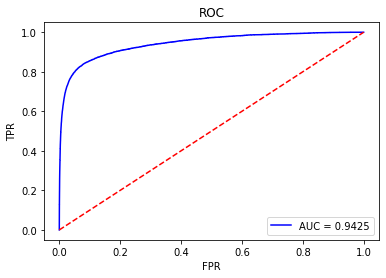

In [183]:
plot_roc(y_test,predslog)

In [ ]:
ks = KS(testData, 'pred', 'label')

<Figure size 864x648 with 0 Axes>

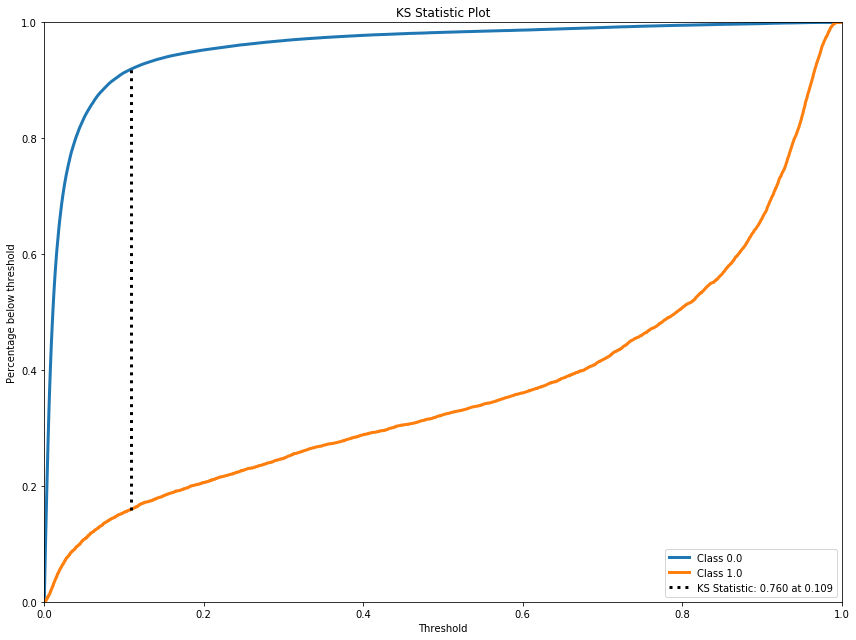

In [193]:
import scikitplot as skplt
plt.figure(figsize=(12,9))
pred = classifier.predict_proba(X_test)
fig, ax = plt.subplots(figsize=(12,9), tight_layout=True)
skplt.metrics.plot_ks_statistic(y_test, pred, ax=ax)
plt.show()

KS值达0.760，模型对好、坏客户的判别有较强的区分能力

AUC达0.942，具有较好的预测性，本文的模型可以作为信贷平台预测违约借款人的参考